# GRAPH APPLICATION
1. BFS 
2. DFS 
3. Shortest Paths 

## 1. Breadth-First-Search 

Explore graph level by level from start node(s)
* level 0 : `{start_point}`
* level `i`: vertices reachable by path of i edges but not fewer 
* build level `i` > 0 from level `i-1` by trying all outgoing edges, but ignoring vertices from previous levels 

### Making Graph - Adjacency Lists

In [3]:
a, b, c, d, e, f, g, h = range(8)
adj = [{b, c}, {a, d}, {a}, {b, e}, {d, f, g}, {e, g, h}, {e, f, h}, {f, g}] # undirected graph

### BFS 

In [12]:
def BFS(s, adj):
    came_from = {s: None}
    frontier = [s]
    level = {s: 0}
    while frontier:
        current = frontier.pop()
        for neighbor in adj[current]:
            if neighbor not in came_from: 
                came_from[neighbor] = current
                frontier.append(neighbor)
                level[neighbor] = level[current]+1
    return came_from, level 

In [13]:
came_from, level = BFS(b, adj)

In [14]:
level

{0: 1, 1: 0, 2: 2, 3: 1, 4: 2, 5: 3, 6: 3, 7: 4}

In [22]:
def track_path(start_point, last_point, came_from):
    path = []
    while last_point != start_point:
        path.append(last_point)
        last_point = came_from[last_point]
    path.append(start_point)
    path.reverse()
    return path

In [23]:
track_path(b, h, came_from)

[7, 6, 4, 3, 1]

### Early Exit
when we have explicit goal, stop expanding the frontier as soon as we find the goal.

In [24]:
def BFS_exit(s, l, adj):
    came_from = {s: None}
    frontier = [s]
    level = {s:0}
    while frontier:
        current = frontier.pop()
        if current == l:
            break
        for neighbor in adj[current]:
            if neighbor not in came_from:
                came_from[neighbor] = current
                frontier.append(neighbor)
                level[neighbor] = level[current]+1
    return came_from, level 

In [25]:
came_from_exit, level_exit = BFS_exit(b, f, adj)

In [26]:
track_path(b, f, came_from_exit)

[5, 4, 3, 1]

In [27]:
came_from_exit

{0: 1, 1: None, 3: 1, 4: 3, 5: 4, 6: 4, 7: 6}

## 2. Depth-First-Search 
Recursively explore graph backtracking as necessary. As if we leave some bread crumbs while expanding so that we can backtrack to the node where we left last time! 
<br>
### DFS 

In [1]:
def DFS(V, adj):
    came_from =  {}
    def DFS_visit(s, adj):
        for v in adj[s]:
            if v not in came_from:
                came_from[v] = s
                DFS_visit(v, adj)
                
    for s in V:
        if s not in came_from :
            came_from[s] = None 
            DFS_visit(s, adj)
    
    return came_from 

In [4]:
DFS([b], adj)

{0: 1, 1: None, 2: 0, 3: 1, 4: 3, 5: 4, 6: 5, 7: 6}

### Topological sort (Sorting vertices in the graph)
Given the directed acyclic graph(DAG), order vertices so that all edges point from lower order to higher order. As edges represent dependencies, some nodes are dependent to others and some aren't. 

In [69]:
DAG = { "foundations" : ["walls"],
                "walls" : ["roof", "plumbing", "windows"],
                "roof" : ["decorating"],
           "plumbing": ["decorating"],
           "windows" : ["decorating"],
           "decorating": []
}

Source is a set of vertices which have no incoming edges

In [70]:
V = ["foundations"]

In [73]:
def topological_sort(V, adj):
    order = []
    def DFS_visit(s, adj):
        for v in adj[s]:
            if v not in order:
                DFS_visit(v, adj)
        order.append(s)
        
    for s in V:
        if s not in order:
            DFS_visit(s, adj)
            
    order.reverse()
    return order

In [74]:
topological_sort(V, DAG)

['foundations', 'walls', 'windows', 'plumbing', 'roof', 'decorating']

## 3. Shortest Paths 
* Dijkstra and A star algorithm
* Bellman-ford algorithm

### Dijkstra 
Prioritize lower cost path using `PriorityQueue`

In [8]:
a, b, c, d, e, f= range(6)
DAG = [{b:2, c:4}, {d:4, e:2, c:1}, {e:3}, {f:2}, {f:2, d:3}, {}]

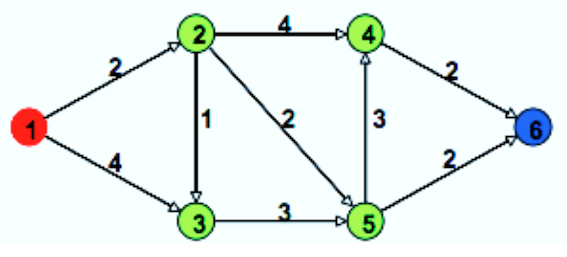

In [3]:
import priorityqueue as pq

In [13]:
def dijkstra(start_point, goal_point, adj):
    frontier = pq.PriorityQueue()
    frontier.put(start_point, 0)
    
    came_from = {start_point: None}
    cost_so_far = {start_point: 0}
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal_point:
            break 
        
        for neighbor in adj[current].keys():
            new_cost = cost_so_far[current]+adj[current][neighbor]
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost 
                frontier.put(neighbor, new_cost)
                came_from[neighbor] = current 
    
    return came_from, cost_so_far

In [24]:
came_from, cost_so_far = dijkstra(a, f, DAG)
print('shortest path : {}'.format(track_path(a, f, came_from)))
print('cost for shortest path from a to F : {}'.format(cost_so_far[f]))

shortest path : [0, 1, 4, 5]
cost for shortest path from a to F : 6


### A star
A modification of Dijkstra's algorithm that is optimized for a single destination. It priortizes paths that seem to be leading closer to the goal

In [ ]:
def heuristic(a, b):
    # Manhattan-Dist 
    

In [ ]:
def a_star(start_point, goal_point, adj):
    frontier = pq.PriorityQueue()
    frontier.put(start_point, 0)
    
    came_from = {start_point: None}
    cost_so_far = {start_point: 0}
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        for neighbor in adj[current].keys():
            new_cost = cost_so_far[current]+adj[current][neighbor]
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                frontier.put(neighbor, new_cost + heuristric(neighbor, current))
                came_from[neighbor] = current 
        
        return came_from, cost_so_far 

### Bellman-Ford algorithm 
Computes all shortest-path lengths from a source `s` to all `v` or determines that a negative-weight cycle exists.  

In [11]:
s, a, b, c, d, e = range(6)
adj = [{a:10, e:8}, {c:2}, {a:1},{b:-2}, {a:-4, c:-1}, {d:1}]

In [6]:
def bellman_ford(source, adj):
    V = len(adj)
    d = [float('inf')]*V
    d[source] = 0
    
    for i in range(0, V):
        for u in range(0, V):
            for v in adj[u].keys():
                if d[v] > d[u] + adj[u][v]:
                    d[v] = d[u] + adj[u][v]

    for u in range(0, V):  # Negative-Cycle detection 
        for v in adj[u].keys():
            if d[v] > d[u] + adj[u][v]:
                d[u] = -1
    return d 

In [12]:
print('Shortest-path distance from source S: {}'.format(bellman_ford(s, adj)))

Shortest-path distance from source S: [0, 5, 5, 7, 9, 8]


### Floyd-Warshall algorithm 
Compute shortest path between all pairs of vertices, edges with negative weights allowed.

In [1]:
_ = float('inf')
adj = [[0, _, -2, _],
      [4, 0, 3, _],
      [_, _, 0, 2],
      [_, -1, _, 0]]

In [2]:
def floyd_warshall(adj):
    V = len(adj)   
    for i in range(V):
        for j in range(V):
            for k in range(V):
                if adj[i][j] > adj[i][k] + adj[k][j]:
                    adj[i][j] = adj[i][k] + adj[k][j]    
    return adj     

In [8]:
floyd_warshall(adj)

[[0, -1, -2, 0], [4, 0, 2, 4], [5, 1, 0, 2], [3, -1, 1, 0]]

references <br>
1. [http://www.redblobgames.com/pathfinding/a-star/introduction.html]
2. [https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/lecture-videos/lecture-14-depth-first-search-dfs-topological-sort/]

In [41]:
all([0,0,0,1]) == 0

True